In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

In [37]:
dataflow = ImageDataGenerator(rescale = 1.0 / 255.0 )

In [38]:
help(dataflow.flow_from_directory)

Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions to which all image

In [39]:
train = dataflow.flow_from_directory("train", class_mode = 'categorical')

Found 40 images belonging to 3 classes.


In [40]:
test = dataflow.flow_from_directory('test', class_mode = 'categorical')

Found 20 images belonging to 3 classes.


In [41]:
test

In [42]:
model = models.Sequential()
model.add( layers.Conv2D( 32, (5, 5 ), activation = 'relu', padding = 'same', input_shape = (256,  256 , 3 )))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (5, 5 ), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(3, activation = 'softmax'))

In [43]:
sgd_opt = tf.keras.optimizers.SGD(lr = 0.001)

/usr/local/lib/python3.7/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [44]:
history=model.compile( optimizer = sgd_opt, loss = 'binary_crossentropy', metrics =  ['accuracy'])

In [45]:
history =model.fit(train, validation_data = test, epochs =100)

Epoch 1/100
2/2 [==============================] - 6s 2s/step - loss: 0.7851 - accuracy: 0.1000 - val_loss: 0.5998 - val_accuracy: 0.8000
Epoch 2/100
2/2 [==============================] - 6s 2s/step - loss: 0.6134 - accuracy: 0.4250 - val_loss: 0.5609 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 6s 5s/step - loss: 0.5627 - accuracy: 0.5250 - val_loss: 0.5302 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 6s 2s/step - loss: 0.5384 - accuracy: 0.5250 - val_loss: 0.5163 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 6s 5s/step - loss: 0.5301 - accuracy: 0.5000 - val_loss: 0.5055 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 6s 2s/step - loss: 0.5111 - accuracy: 0.5250 - val_loss: 0.5003 - val_accuracy: 0.4500
Epoch 7/100
2/2 [==============================] - 6s 2s/step - loss: 0.5030 - accuracy: 0.5250 - val_loss: 0.5115 - val_accuracy: 0.5000
Epoch 8/100
2/2 [=================

In [46]:
test_loss, test_accuracy = model.evaluate(test)

1/1 [==============================] - 1s 624ms/step - loss: 0.4955 - accuracy: 0.4000


In [47]:
print("test_loss ", test_loss)
print("test_accuracy ", test_accuracy)

test_loss  0.4954816401004791
test_accuracy  0.4000000059604645


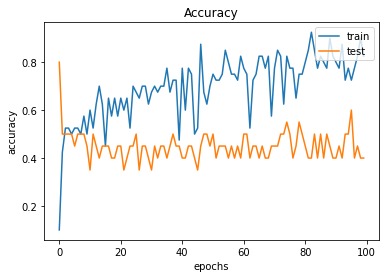

In [48]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [49]:
history =model.fit(train, validation_data = test, epochs =200)

Epoch 1/200
2/2 [==============================] - 6s 2s/step - loss: 0.2931 - accuracy: 0.8250 - val_loss: 0.4939 - val_accuracy: 0.5500
Epoch 2/200
2/2 [==============================] - 6s 5s/step - loss: 0.2822 - accuracy: 0.8750 - val_loss: 0.4931 - val_accuracy: 0.4000
Epoch 3/200
2/2 [==============================] - 6s 5s/step - loss: 0.3269 - accuracy: 0.7250 - val_loss: 0.4943 - val_accuracy: 0.4000
Epoch 4/200
2/2 [==============================] - 6s 5s/step - loss: 0.4003 - accuracy: 0.5750 - val_loss: 0.5037 - val_accuracy: 0.4500
Epoch 5/200
2/2 [==============================] - 6s 2s/step - loss: 0.2792 - accuracy: 0.9000 - val_loss: 0.4887 - val_accuracy: 0.5500
Epoch 6/200
2/2 [==============================] - 6s 5s/step - loss: 0.3065 - accuracy: 0.8000 - val_loss: 0.4912 - val_accuracy: 0.4000
Epoch 7/200
2/2 [==============================] - 6s 4s/step - loss: 0.2938 - accuracy: 0.7750 - val_loss: 0.4911 - val_accuracy: 0.5000
Epoch 8/200
2/2 [=================

In [50]:
test_loss, test_accuracy = model.evaluate(test)

1/1 [==============================] - 1s 630ms/step - loss: 0.6798 - accuracy: 0.6500


In [51]:
print("test_loss ", test_loss)
print("test_accuracy ", test_accuracy)

test_loss  0.6797910332679749
test_accuracy  0.6499999761581421


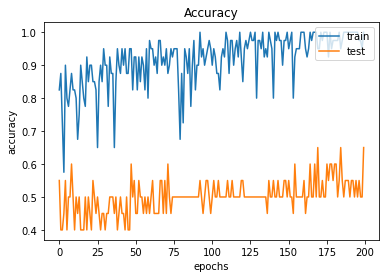

In [52]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [53]:
history =model.fit(train, validation_data = test, epochs =300)

Epoch 1/300
2/2 [==============================] - 6s 5s/step - loss: 0.0952 - accuracy: 0.9500 - val_loss: 0.6976 - val_accuracy: 0.5500
Epoch 2/300
2/2 [==============================] - 6s 2s/step - loss: 0.0662 - accuracy: 0.9500 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 6s 5s/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 0.6504 - val_accuracy: 0.5500
Epoch 4/300
2/2 [==============================] - 6s 5s/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 0.6666 - val_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 6s 2s/step - loss: 0.0604 - accuracy: 1.0000 - val_loss: 0.6635 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 6s 5s/step - loss: 0.0761 - accuracy: 0.9750 - val_loss: 0.6768 - val_accuracy: 0.5500
Epoch 7/300
2/2 [==============================] - 6s 2s/step - loss: 0.0709 - accuracy: 1.0000 - val_loss: 0.7654 - val_accuracy: 0.5000
Epoch 8/300
2/2 [=================

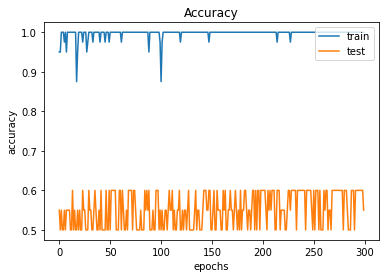

In [54]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [55]:
test_loss, test_accuracy = model.evaluate(test)


1/1 [==============================] - 1s 586ms/step - loss: 1.0000 - accuracy: 0.5500


In [56]:
print("test_loss ", test_loss)
print("test_accuracy ", test_accuracy)

test_loss  1.0000026226043701
test_accuracy  0.550000011920929
